# Descriptores de forma

Los descriptores geométricos analizan la forma estructural de objetos binarios y sus contornos. Se pueden utilizar para identificar objetos y reconocer patrones en una imagen.
Algunos ejemplos son:
- `Área` Mide el número de píxeles que contiene la región de interés.
- `Bounding box (bbox)` Consiste en el rectángulo más pequeño capaz de albergar la región de interés (rectángulo rojo).
- `Área de la bbox`  Número de píxeles que contiene la bounding box.
- `Convex hull image` Consiste en el polígono convexo más pequeño capaz de albergar la región de interés (polígono cyan).
- `Área de la convex image` Mide el número de píxeles dentro de la convex image.
- `Excentricidad` Es la relación de la distancia entre los focos de la elipse y su longitud del eje principal. Una elipse con excentricidad=0 es un círculo, mientras que una excentricidad =1 denota un segmento de línea.
- `Diámetro equivalente` Consiste en el diámetro de un círculo cuya área sea la misma que la región de interés
- `Extensión` Se define como el ratio de píxeles en la región con respecto al número total de píxeles contenidos en la bounding box.
- `Longitud del eje mayor` Se refiere a la longitud del eje mayor de una elipse que tiene el mismo segundo momento central normalizado que la región.
- `Longitud del eje menor` Igual para el eje menor de la elipse.
- `Orientación` Es el ángulo que forma la elipse anterior con respecto al eje horizontal. El valor se expresa en grados en un rango de [-90, 90].
- `Perímetro` Se define como el número de píxeles que forman parte del contorno del objeto de interés.
- `Solidez` Corresponde con la proporción de píxeles que contiene el área respecto a la convex hull image. En el caso de polígonos regulares, su valor será 1.

A partir de estos descriptores se podrían extraer otros de interés como:
- `Compacidad` Mide la circularidad del objeto. Se calcula como el cociente entre el área y el perímetro al cuadrado.
- `Rectangularidad` Se define como el cociente entre el área del objeto y la bounding box.

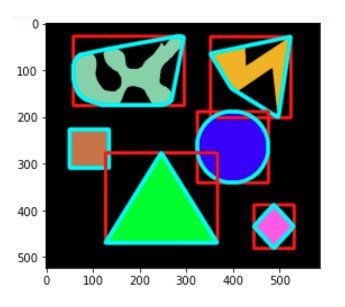

## Matriz de coocurrencias

La matriz de coocurrencias mide la frecuencia en la que un píxel con nivel de intensidad `i` es adyacente de un píxel con nivel de intensidad `j`. La adyacencia se define a través de un número de píxeles vecinos `d` y una orientación (ángulo, `𝜶`). 

A partir de estos valores, es posible extraer diferentes características como: el contraste, la correlación, la disimilitud, la homogeneidad, la energía y momento angular.

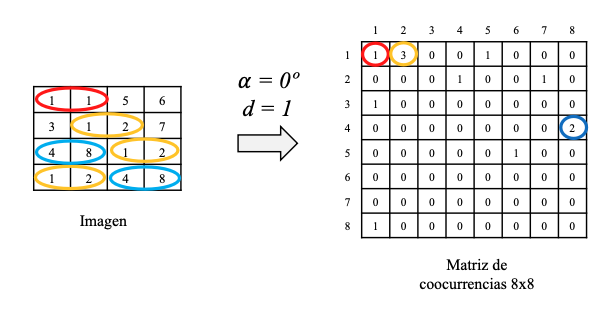

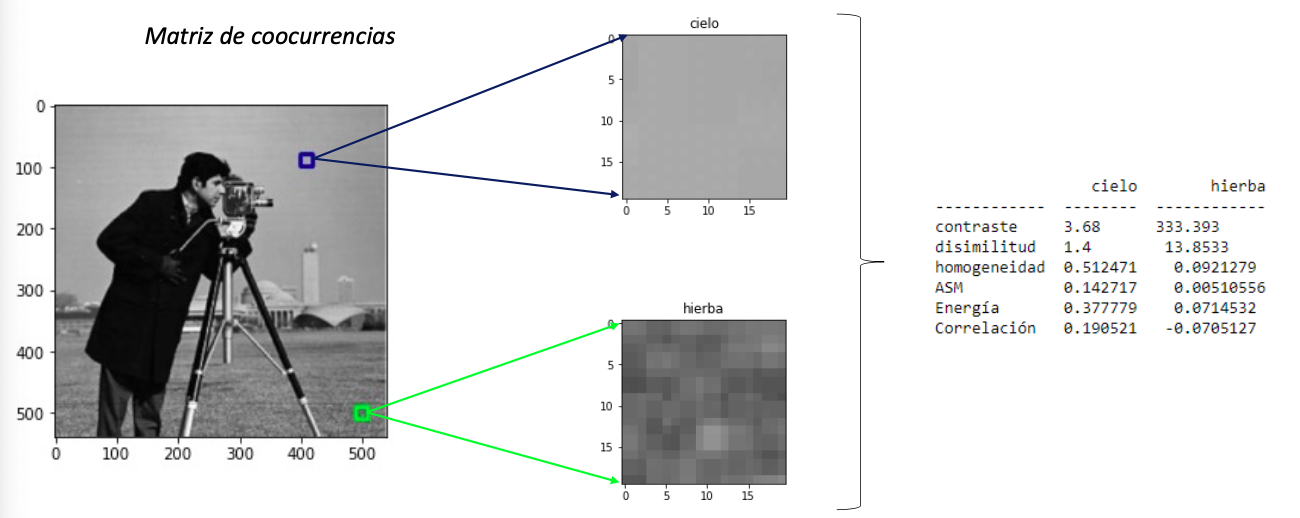


In [ ]:
# En primer lugar, obtenemos la máscara de la imagen original mediante la umbralización con Otsu
import matplotlib.pyplot as plt
import cv2
import numpy as np
img = cv2.imread('images/figuras.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
t, mask = cv2.threshold(img_gray,0,1,cv2.THRESH_OTSU)

plt.imshow(mask, cmap='gray')
plt.title('Máscara Otsu t=' + str(t))
plt.show()

In [ ]:
# Convertimos la imagen binaria en una imagen de etiquetas 
# para tener acceso a cada objeto por separado
from skimage.measure import label

## El label me permite generar diferentes instancias para 
## los diferentes objetos para poder seleccionarlos después
lab, num = label(mask, return_num=True)  

# Importante:
# En 'num' devuelve 6 valores correspondientes a los 6 objetos que hay en la imagen.
# Sin embargo, 'lab' contiene hasta 7 valores diferentes, ya que también tiene en cuenta el fondo de la imagen.
print('número de objetos: ', num)
v,c = np.unique(lab, return_counts=True)
print('posibles valores de intensidad: ', v)

plt.imshow(lab, cmap='gray')
plt.show()

In [ ]:
# Podemos acceder de manera independiente al objeto que nos interese a partir de su etiqueta correspondiente
objeto = lab == 1
objeto = objeto.astype('uint8')
plt.imshow(objeto, cmap='gray')
plt.show()

In [ ]:
# Podemos acceder de manera independiente al objeto que nos interese a partir de su etiqueta correspondiente
objeto = lab == 2 ## Le cambio el label y veo que me devuelve otra figura
objeto = objeto.astype('uint8')
plt.imshow(objeto, cmap='gray')
plt.show()

In [ ]:
# Podemos acceder de manera independiente al objeto que nos interese a partir de su etiqueta correspondiente
objeto = lab == 3 ## Le cambio el label y veo que me devuelve otra figura
objeto = objeto.astype('uint8')
plt.imshow(objeto, cmap='gray')
plt.show()

In [ ]:
from skimage.measure import regionprops
# https://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.regionprops

# Después, podemos extraer la bounding box de dicho objeto
prop = regionprops(objeto)
bbox = prop[0].bbox
print(bbox)
start_point = (bbox[1], bbox[0])
end_point = (bbox[3], bbox[2])
window = cv2.rectangle(img.copy(), 
                       start_point, 
                       end_point, 
                       (0, 255, 0), 
                       10)
                     
plt.imshow(window, cmap='gray')
plt.show()

In [ ]:
## Y la convex hull image - Me permite encontrar los contornos de la imagen
## Esta función si o si necesita una imagen binaria.
from skimage.morphology import convex_hull_image

convex_image = convex_hull_image(objeto)
convex_image = convex_image.astype('uint8')
# plt.imshow(convex_image, cmap='gray')
# plt.show()

conts,_ = cv2.findContours(convex_image, 
                           cv2.RETR_TREE, 
                           cv2.CHAIN_APPROX_SIMPLE) # Encontramos los contornos en una máscara 
imagen = cv2.drawContours(img.copy(), 
                          conts, 
                          -1, 
                          (255,0,0), 
                          5) # Dibujamos los contornos
                     
plt.imshow(imagen, cmap='gray')
plt.show()

In [ ]:
# Repetimos el proceso completo para todos los objetos de la imagen
imagen = img.copy()
for i in range(1, num+1): 
    objeto = lab == i
    objeto = objeto.astype('uint8')
    
    # bbox
    prop = regionprops(objeto)
    bbox = prop[0].bbox
    imagen = cv2.rectangle(imagen, (bbox[1], bbox[0]), (bbox[3], bbox[2]), (255, 0, 0), 5)
    
    # covex hull
    convex_image = convex_hull_image(objeto)
    convex_image = convex_image.astype('uint8')
    conts,_ = cv2.findContours(convex_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    imagen = cv2.drawContours(imagen, conts, -1, (0,255,255), 8)

plt.imshow(imagen, cmap='gray')
plt.show()

In [ ]:
# Vamos a extraer diferentes descriptores geométricos que nos 
# ayudarán a caracterizar los objetos.
# !pip install tabulate
from tabulate import tabulate
import pandas as pd
import math

new_lab, new_num = label(mask, return_num=True)

# Extraemos las característicias geométricas
headers = ['','Raro', 'Rayo', 'Círculo', 'Cuadrado', 'Triángulo', 'Rombo']
A,BB,CA,E,ED,EX,MA,MiA,OR,P,S,CO,R = ['area'], ['bbox_area'], ['convex_area'], ['eccentricity'], ['equiv_diameter'], \
['extent'], ['major_axis'], ['minor_axis'], ['orientation'], ['perimeter'], ['solidity'], ['compactness'], ['rectangularity']

for i in range(1,new_num+1):
    objeto = new_lab == i
    prop = regionprops(objeto.astype(np.uint8))
    
    A.append(np.round(prop[0].area, 4))
    BB.append(np.round(prop[0].bbox_area, 4))
    CA.append(np.round(prop[0].convex_area, 4))
    E.append(np.round(prop[0].eccentricity, 4))
    ED.append(np.round(prop[0].equivalent_diameter, 4))
    EX.append(np.round(prop[0].extent, 4))
    MA.append(np.round(prop[0].major_axis_length, 4))
    MiA.append(np.round(prop[0].minor_axis_length, 4))
    OR.append(np.round(prop[0].orientation, 4))
    P.append(np.round(prop[0].perimeter, 4))
    S.append(np.round(prop[0].solidity, 4))
    CO.append(np.round(4*math.pi*prop[0].area/prop[0].perimeter**2, 4))
    R.append(np.round(prop[0].area/prop[0].bbox_area, 4))


my_data = [tuple(A), tuple(BB), tuple(CA), tuple(E), tuple(ED), tuple(EX), \
          tuple(MA), tuple(MiA), tuple(OR), tuple(P), tuple(S), tuple(CO), tuple(R)]

#print(tabulate(my_data, headers=headers))


df = pd.DataFrame(my_data)
df.columns = headers
df